# Análisis de sentimientos en Twitter 👎👍

Desarrollado por Jacobo Arias. <br>
Github: [@Jacobo-Arias](https://github.com/Jacobo-Arias)

## Resumen

Twitter se podría considerar como un mini blog donde las personas publican tuits sobre politica, algun tema de deportes, chismes o incluso simples pensamientos que se les ocurran, en este trabajo se toma una base de datos con 1'600.000 [1]  tuits clasificados entre positivos y negativos (4 y 0 respectivamente) y se compara con la clasificación dada por la red preentranada para clasificación de sentimientos VADER con los datos en crudo y con un pre-procesamiento dado, el cual incluye tokenización, eliminación de stopwords, eliminación de símbolos no alfabéticos y lematización dando un resultado muy similar, ambos al rededor del 50%-51% de efectividad; Posteriormente se realiza el mismo ejercicio con Stanza, otra herramiente para la clasificación de sentimientos desarollada por el grupo de procesamiento de lenguaje natural de la Universidad de Stanford, para ambos casos se utilizaron 50000 datos positivos y negativos elegidos aleatoriamente ya que el tiempo de procesamiento con esta herramienta es mayor, dando como resultados 48.99% y 38.82% de acierto con los datos si procesar y procesados respectivamente.

## Introducción

es una red social permite enviar mensajes de texto plano de corta longitud, con un máximo de 280 caracteres  llamados tuits, que se muestran en la página principal del usuario. Se podría considerar como un mini blog donde las personas publican tuits sobre política, algún tema de deportes, chismes o incluso simples pensamientos que se les ocurran; En este trabajo se toma una base de datos con 1'600.000 tuits previamente clasificados como positivos o negativos con valores de 4 y 0 respectivamente.

### Análisis de sentimientos

"El análisis de sentimientos puede ayudarlo a determinar la proporción de interacciones positivas y negativas sobre un tema específico. Puede analizar cuerpos de texto, como comentarios, tweets y reseñas de productos, para obtener información de su audiencia."


### Vader


"VADER (Valence Aware Dictionary and sEntiment Reasoner) es una herramienta de análisis de sentimientos basada en reglas y léxico que está específicamente en sintonía con los sentimientos expresados en las redes sociales"[2].

Como bien lo dice en el repositorio oficial, VADER presenta un mejor desempeño en textos cortos y con la forma de expresión en redes sociales, por dicha razón fue la que se decidió elegir VADER como el analizador para este proyecto, además de su facilidad de usar y resultados claros que arroja

### Stanza

"Stanza es una colección de herramientas precisas y eficientes para el análisis lingüístico de muchos lenguajes humanos. Desde el texto en bruto hasta el análisis sintáctico y el reconocimiento de entidades, Stanza lleva modelos de PNL de última generación a los idiomas que elijas."[3]

Stanza es una librería de python creada por el grupo de procesamiento de lenguaje natural de la Universidad de Stanford (Stanford NLP group) para el procesamiento de varios lenguajes humanos y actualmente presenta modelos en Ingles, Chino y Alemán

## Planteamiento del problema

"Twitter es mucho mas de quienes lo han calificado como un simple chat, y el impacto que ha tenido este microblogging es descomunal." [4]

Y así es, en pleno siglo XXI, donde vinimos en la época de la inmediatez Twitter se ha vuelto una de las redes sociales más usadas en la actualidad gracias a su diseño simplista y fácil de usar, en el cual mediante textos de 280 caracteres se puede expresar una idea o hacer un comentario sobre temas que pueden ir desde deportes, salud, actualidad periodística hasta temas como la música y el chisme, además de recibir respuesta al instante de otras personas haciendo que la comunicación sea bidireccional llegando hasta cientos de miles de personas según el caso.

Gracias a su inmensa cantidad de usuarios y su inmediatez en la publicación se puede llegar a saber de qué temas la gente está hablando más en un momento dado, bien sea un nuevo tema musical de cierto artista, política o un producto nuevo de alguna empresa.

Al generase una discusión tan abierta y accesible a tantas personas a través de Twitter, es claro que todos los tuits no tendrán la misma connotación, por lo que desde el punto de vista del análisis de sentimientos de podrían categorizar en tuits negativos, positivos o neutros y de esto sale la necesidad de hacer un análisis de sentimientos para identificar si las opiniones de las personas son positivas, negativas o neutras.

Es por todo esto que se decide tomar una base de datos con 1’600.000 tuits, repartidos entre positivos y negativos a partes iguales y analizarlos con algunas de las herramientas disponibles en el lenguaje python y analizar los resultados respecto a los datos originales, lo cual nos deja la pregunta; ¿Qué porcentaje de similitud arrojarán las herramientas de análisis de sentimientos frente a la clasificación original

## Justificación
El análisis de sentimientos ha sido aplicado en distintas áreas como lo son el servicio al cliente, ventas, productos, etc.. Y ya que twitter es una fuente tan basta e opiniones de diversos usuarios se hace fundamental generar un análisis de dichas opiniones y comparar que herramientas arrojan un mejor resultado

Con el desarrollo de este proyecto se busca analizar dos herramientas existentes en el análisis de sentimientos y evaluar sus resultados con y sin un pre-procesamiento previo.

## Desarrollo 

Para ejecutar este cuaderno se debe descargar la base de datos [aqui](https://www.kaggle.com/kazanova/sentiment140), extraer un archivo en una carpeta llamada *tweets_data* y renombrarlo como *Raw_tweets.csv*, dicha carpeta debe estar en el mismo directorio que este cuaderno de jupyter

Las librerías requeridas para este proyecto son: nltk, stanza, python-csv y matplotlib, si no tiene alguna de estas instaladas decomentar la línea correspondiente en la siguiente celda y ejecutarla

In [1]:
# !pip install nltk
# !pip install stanza
# !pip install python-csv
# !pip install matplotlib

In [2]:
import csv
import sys
import nltk
from random import shuffle
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [3]:
nltk.download([
    "names",
    "stopwords",
    "vader_lexicon",
    "punkt",
    "words",
    "wordnet"
])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\EQUIPO\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EQUIPO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\EQUIPO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EQUIPO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\EQUIPO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EQUIPO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
tweets = []
with open("tweets_data/Raw_tweets.csv", encoding='latin1') as fichero:
    lector = csv.reader(fichero)
    for line in lector:
        tweets.append({"polarity":line[0],"text":line[-1]})

In [5]:
polaridades = {'0':0,'2':0,'4':0}
for t in tweets:
    polaridades[t['polarity']] += 1

In [6]:
polaridades

{'0': 800000, '2': 0, '4': 800000}

In [7]:
polaridades = {"Negativo":polaridades["0"],"Neutro":polaridades["2"],"Positivo":polaridades["4"]}

In [8]:
polaridades

{'Negativo': 800000, 'Neutro': 0, 'Positivo': 800000}

<Container object of 3 artists>

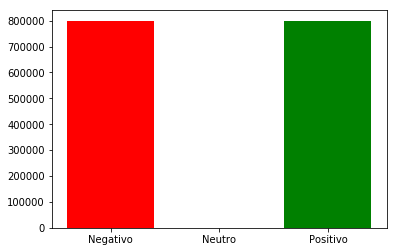

In [9]:
plt.bar(polaridades.keys(),polaridades.values(), color = ["red","lightblue","green"])

In [10]:
def vader_analysis(tweets):
    analyzer = SentimentIntensityAnalyzer()
    result = {"Negativo":0,"Neutro":0,"Positivo":0}
    tweets_vader = []
    correct = 0
    for tweet in tweets:
        polarity = None
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        if compound > 0.05:
            result["Positivo"] += 1
            polarity = "4"
        elif compound < -0.05: 
            polarity = "0"
            result["Negativo"] += 1
        else:
            polarity = "2"
            result["Neutro"] += 1
        
        tweets_vader.append({"polarity":polarity,"text":tweet["text"]})
        if tweet["polarity"] == polarity:
            correct += 1
    return result, tweets_vader, correct

In [11]:
vader_result,tweets_vader, correct = vader_analysis(tweets)

In [12]:
vader_result

{'Negativo': 414821, 'Neutro': 443836, 'Positivo': 741343}

<Container object of 3 artists>

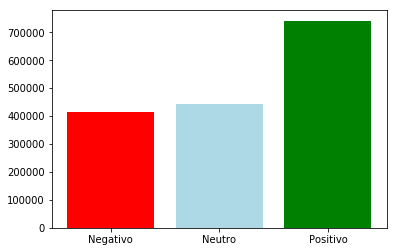

In [13]:
plt.bar(vader_result.keys(),vader_result.values(), color = ["red","lightblue","green"])

In [14]:
print(f"{correct} de {len(tweets)} correctas, teniendo un {correct / len(tweets):.2%} clasificados correctamente")

827378 de 1600000 correctas, teniendo un 51.71% clasificados correctamente


### Ahora un preprocesamiento

In [15]:
stopwords = nltk.corpus.stopwords.words("english")

In [16]:
tweets_pos = [x for x in tweets if x["polarity"] == "4"]
tweets_neg = [x for x in tweets if x["polarity"] == "0"]
shuffle(tweets_pos)
shuffle(tweets_neg)

In [17]:
print(len(tweets_neg), len(tweets_pos))

800000 800000


In [18]:
sub_tweets = tweets_pos[0:250000].copy() + tweets_neg[0:250000].copy()
print(len(sub_tweets))

500000


In [19]:
def decontracted(phrase):
    # Specific
    #phrase = re.sub(r"won\'t", "will not", phrase)
    #phrase = re.sub(r"can\'t", "can not", phrase)

    # General
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " be", phrase)
    phrase = re.sub(r"\'s", " be", phrase)
    phrase = re.sub(r"\'d", " will", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " be", phrase)
    return phrase

In [20]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.VERB

In [21]:
for t in sub_tweets:
    text = t["text"]
    text = nltk.word_tokenize(text)
    text = [w for w in text if w.lower() not in stopwords]
    text = [w for w in text if w.isalpha()]
    tagged = nltk.pos_tag(text)
    tokens_lemma = [lemmatizer.lemmatize(token[0], get_wordnet_pos(token[1])) for token in tagged]
    text = " ".join(tokens_lemma)
    t["text"] = text

In [22]:
vader_result,tweets_vader, correct = vader_analysis(sub_tweets)

In [23]:
vader_result

{'Negativo': 115753, 'Neutro': 136877, 'Positivo': 247370}

<Container object of 3 artists>

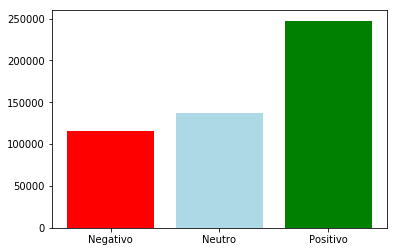

In [24]:
plt.bar(vader_result.keys(),vader_result.values(), color = ["red","lightblue","green"])

In [25]:
print(f"{correct} de {len(sub_tweets)} correctas, teniendo un {correct / len(sub_tweets):.2%} clasificados correctamente")

250907 de 500000 correctas, teniendo un 50.18% clasificados correctamente


## Ahora con Stanza

In [26]:
import stanza

In [27]:
tweets = []
with open("tweets_data/Raw_tweets.csv", encoding='latin1') as fichero:
    lector = csv.reader(fichero)
    for line in lector:
        tweets.append({"polarity":line[0],"text":line[-1]})

In [28]:
def stanza_analysis(tweets):
    stn = stanza.Pipeline(lang='en', processors='tokenize,sentiment')
    result = {"Negativo":0,"Neutro":0,"Positivo":0}
    tweets_stanza = []
    correct = 0
    for tweet in tweets:
        polarity = None
        sents = stn(tweet["text"]).sentences
        media = 0
        for s in sents:
            media += s.sentiment
        if len(sents) == 0:
            continue
        try:
            media /= len(sents)
        except:
            print(tweet["text"],"\n",sents)
            return 0,0,0
        if media > 1.2:
            result["Positivo"] += 1
            polarity = "4"
        elif media < 0.8: 
            polarity = "0"
            result["Negativo"] += 1
        else:
            polarity = "2"
            result["Neutro"] += 1
        
        tweets_stanza.append({"polarity":polarity,"text":tweet["text"]})
        if tweet["polarity"] == polarity:
            correct += 1
    return result, tweets_stanza, correct

In [29]:
tweets_pos = [x for x in tweets if x["polarity"] == "4"]
tweets_neg = [x for x in tweets if x["polarity"] == "0"]
shuffle(tweets_pos)
shuffle(tweets_neg)

In [30]:
print(len(tweets_neg), len(tweets_pos))
sub_tweets = tweets_pos[0:50000].copy() + tweets_neg[0:50000].copy()
print(len(sub_tweets))

800000 800000
100000


In [31]:
stanza_result,tweets_Stanza, correct = stanza_analysis(sub_tweets)

2021-07-03 13:49:09 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2021-07-03 13:49:09 INFO: Use device: cpu
2021-07-03 13:49:09 INFO: Loading: tokenize
2021-07-03 13:49:10 INFO: Loading: sentiment
2021-07-03 13:49:12 INFO: Done loading processors!
D:\Anaconda\lib\site-packages\torch\nn\functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [32]:
stanza_result

{'Negativo': 39459, 'Neutro': 35549, 'Positivo': 24992}

<Container object of 3 artists>

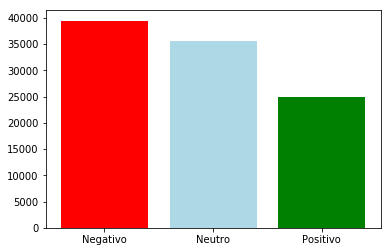

In [33]:
plt.bar(stanza_result.keys(),stanza_result.values(), color = ["red","lightblue","green"])

In [34]:
print(f"{correct} de {len(sub_tweets)} correctas, teniendo un {correct / len(sub_tweets):.2%} clasificados correctamente")

48993 de 100000 correctas, teniendo un 48.99% clasificados correctamente


### Ahora con un preprocesamiento

In [35]:
len(sub_tweets)

100000

In [36]:
for t in sub_tweets:
    text = t["text"]
    text = nltk.word_tokenize(text)
    text = [w for w in text if w.isalpha()]
    text = [w for w in text if w.lower() not in stopwords]
    tagged = nltk.pos_tag(text)
    tokens_lemma = [lemmatizer.lemmatize(token[0], get_wordnet_pos(token[1])) for token in tagged]
    text = " ".join(tokens_lemma)
    t["text"] = text

In [37]:
stanza_result,tweets_Stanza, correct = stanza_analysis(sub_tweets)

2021-07-03 14:42:37 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2021-07-03 14:42:37 INFO: Use device: cpu
2021-07-03 14:42:37 INFO: Loading: tokenize
2021-07-03 14:42:37 INFO: Loading: sentiment
2021-07-03 14:42:38 INFO: Done loading processors!


In [38]:
stanza_result

{'Negativo': 26672, 'Neutro': 47803, 'Positivo': 25368}

<Container object of 3 artists>

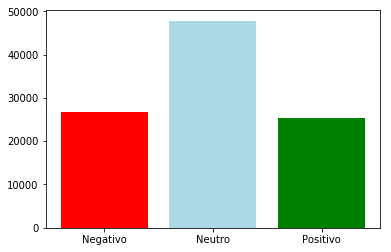

In [39]:
plt.bar(stanza_result.keys(),stanza_result.values(), color = ["red","lightblue","green"])

In [40]:
print(f"{correct} de {len(sub_tweets)} correctas, teniendo un {correct / len(sub_tweets):.2%} clasificados correctamente")

38818 de 100000 correctas, teniendo un 38.82% clasificados correctamente


In [41]:
vacio = 0
texto = 0
for t in sub_tweets:
    if t["text"] == "":
        vacio += 1
    else:
        texto +=1
texto,vacio

(99843, 157)

## Resultados y Discusión

| Herramienta| Datos sin pre-procesamiento | Datos con pre-procesamiento |
| :----- | :----- | :----- |
| VADER | 51.71% | 50.18% |
| Stanza| 48.99% | 38.82% |

Luego de analizar los resultados se concluye que en parte los bajos porcentajes de acierto se deben a que no todos los tuits están en inglés, ya que cuando se analiza un tuit que no está en ingles el resultado arroja que es neutro.

En el caso de VADER tiene sentido que con el pre-procesamiento baje el porcentaje de acierto ya que esta herramienta  está especialmente entrenada para aumentar el peso de la calificación basado en la forma de escribir en redes sociales, tales como signos de puntuación y emoticones.

Para el caso de Stanza los porcentajes tan bajo se podría atribuir los bajos porcentajes a que Stanza analiza los textos por sentencias, por lo que se realizó un promedio del valor de todas sus sentencias, se podría mejorar el porcentaje de acierto aplicando otras estrategias con Stanza o simplemente dejando por fuera el intervalo de neutro.

## Conclusiones

VADER y Stanza son herramientas útiles para el análisis de sentimientos para redes sociales, en especial para análisis de textos cortos de redes sociales, aunque si se desea obtener un mejor resultado y se tiene un corpus con muchos datos se recomienda crear una red propia y entrenarla para arrojar mejores resultados, teniendo presentes los tokens no alfanuméricos 

### Bibliografía

[2] Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014

[3] NLP Group, Stanford Univerity, https://github.com/stanfordnlp/stanza

[4] https://www.webespacio.com/el-impacto-social-de-twitter/